In [23]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Generating the Data

In [24]:
def gen_data_polynomial(start=10, end=1000, step=2, degree=2, normalized=False):
    
    x1 = np.array(range(start, end, step)).reshape(-1, 1)
    y_org = np.add(np.add(np.multiply(x1, 100), np.multiply(np.square(x1), 80)), 5)
    
    if normalized:
        x1 = calculate_normalized(x1)
    
    y = 2+ 3*x1 + 2*(x1**2) + 1*(x1**3) + 70*(x1**4)    
    #y = np.add(np.multiply(np.power(x1, 3), 70), np.add(np.add(np.multiply(x1, 3), np.multiply(np.square(x1), 2)), 2))
    #y = np.add(np.multiply(np.power(x1, 3), 70), np.add(np.add(np.multiply(x1, 3), np.multiply(np.square(x1), 2)), 2))

    
    #Adding constant feature x0
    x = np.hstack((np.ones(x1.shape), x1))

    #Adding polynomial features
    for degree in range (2, degree+1):
        new_feature = np.power(x1, degree)
        x = np.hstack((x, new_feature))
    
    params = np.ones((degree+1, 1))
    
    return x,y,params,y_org

### Normalization Function - Calculation

In [25]:
def calculate_normalized(feature):
    
    res = np.subtract(feature, np.mean(feature))
    range_feature = np.max(feature)-np.min(feature)
    res = np.divide(res, range_feature)
    
    return res

### Normalization Function - Wrapper

In [26]:
def normalize(x, y=None):
    
    #x.shape[1] = no. of columns = no, features
    #starting from 1 to skip constant feature
    for i in range(1, x.shape[1]):
        x[:, i] = calculate_normalized(x[:, i])
    
    if y is not None:
        #normalizing prediction variable  
        y = calculate_normalized(y)
        return x, y
    
    return x


### Hypothesis Function

In [27]:
def calculate_hypothesis(x, params):
    
    h_of_x = np.dot(x, params)
    
    return h_of_x

### Cost Function 

In [28]:
def cost_function(x, y, params):
    
    #Total training examples
    m = len(y)
    
    #Calculating hypothesis (predictions)
    h = calculate_hypothesis(x, params)
    
    #Calculating cost
    diff = np.subtract(h, y)
    squared_sum = np.sum(np.square(diff))
    cost = np.divide(squared_sum, m*2)
        
    return cost

### Function to calculate Sum of Errors (formula) 

In [29]:
def calculate_sum_of_errors(x, y, params, xi):
    
    xi = xi.reshape(len(xi), 1)

    #hypothesis h(x)
    h_of_x = calculate_hypothesis(x, params)
        
    #performing calculations
    diff = np.subtract(h_of_x, y)
    res = np.multiply(diff, xi)
    sum_of_errors = np.sum(res)

    return sum_of_errors

In [30]:
def calculate_sum_of_errors_vect(x, y, params):

    #hypothesis h(x)
    h_of_x = calculate_hypothesis(x, params)
        
    #performing calculations
    diff = np.subtract(h_of_x, y)
    sum_of_errors = np.dot(x.transpose(), diff)

    return sum_of_errors

### Gradient Descent Function

In [31]:
def gradient_descent(x, y, params, alpha=0.001, precision=0.000000001, iterations = 0):
    
    #Total count of training exmaples and features
    m = len(y)
    n = len(params)
    
    #Creating a list for storing our cost function history
    cost_history = list()
    
    first_iteration = True
    its = 0
    iterate = False
    
    if iterations > 0:
        iterate = True
    
    while True:
        
        gradients = np.multiply(calculate_sum_of_errors_vect(x, y, params), 1/m)
        res = np.multiply(gradients, alpha)
        params = np.subtract(params, res)
        
        #Fail-safe
        if(sum(1 for val in params if val < 0) > 0):
            print("Fail safe activated")
            break

        #Keeping track of the history of cost
        current_cost = cost_function(x, y, params)
        
#         if its%100 == 0:
#         print("theta0 = {} | theta1 = {} | theta2 = {} | cost = {} \n".format(params[0],params[1],params[2], current_cost))
            
        
        if not(first_iteration) and ((cost_history[-1] - current_cost) <= precision):
            print("Precision naileddd!")
            break
                
        if first_iteration:
            first_iteration = False
        
        cost_history.append(current_cost)
        
        its +=1
        
        if iterate and (its == iterations):
            break
            
    return params, cost_history, its
    

In [32]:
degree = 4
x, y, params, y_org = gen_data_polynomial(end=100, degree=degree, normalized=True)

Text(0,0.5,'y')

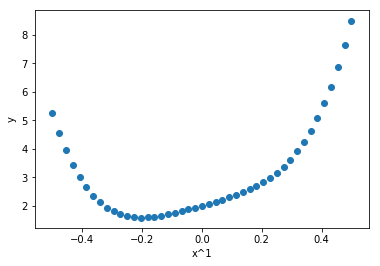

In [33]:
plt.scatter(x[:, 1], y)
plt.xlabel("x^1")
plt.ylabel("y")

In [34]:
params = np.ones((degree+1, 1))
theta, cost_hist, its = gradient_descent(x, y, params, alpha=0.1, precision= 0.0000000001, iterations=2000000)

Precision naileddd!


In [35]:
print("theta0 = {} | theta1 = {} | theta2 = {} | theta3 = {} | theta4 = {}".format(theta[0], theta[1], theta[2], theta[3], theta[4]))

theta0 = [1.99283292] | theta1 = [3.] | theta2 = [2.27216476] | theta3 = [1.] | theta4 = [68.78823751]


In [36]:
#Cost on above params
cost_hist[-1]

1.9637333034971967e-05

### Cost History against iterations

Text(0,0.5,'Cost')

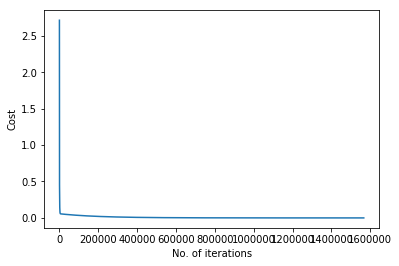

In [37]:
cost_hist = np.array(cost_hist)
iterations = np.arange(1, its+1)

plt.plot(iterations, cost_hist)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

Text(0,0.5,'y')

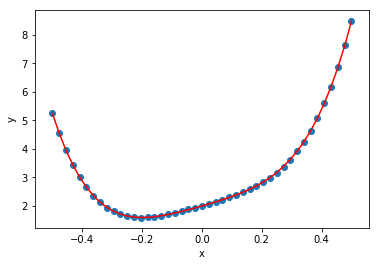

In [38]:
predicted_price = calculate_hypothesis(x, theta)
# print(price)
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predicted_price, color='r')

plt.xlabel("x")
plt.ylabel("y")